In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [122]:
df=pd.read_html("https://fbref.com/en/comps/9/stats/Premier-League-Stats#all_stats_standard",
                attrs={"id":"stats_squads_standard_for"})[0]

In [123]:
df.columns = df.columns.droplevel(0)

In [124]:
df.columns.values

array(['Squad', '# Pl', 'Age', 'Poss', 'MP', 'Starts', 'Min', '90s',
       'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'Gls', 'Ast', 'G+A',
       'G-PK', 'G+A-PK', 'xG', 'xAG', 'xG+xAG', 'npxG', 'npxG+xAG'],
      dtype=object)

In [125]:
df.columns.values[22]="Gls_p90"
df.columns.values[23]="Ast_p90"
df.columns.values[24]="G+A_p90"
df.columns.values[25]="G-PK_p90"
df.columns.values[26]="G+A-PK_p90"
df.columns.values[27]="xG_p90"
df.columns.values[28]="xAG_p90"
df.columns.values[29]="xG+xAG_p90"
df.columns.values[30]="npxG_p90"
df.columns.values[31]="npxG+xAG_p90"

In [127]:
for x in range(20):
    df["Rank"][x]=x+1

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_6172\3054615762.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Rank"][x]=x+1
C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_6172\3054615762.py:2: SettingWithCopyWarning: 
A va

In [128]:
df

,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,Ast,...,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,xG_p90,xAG_p90,xG+xAG_p90,npxG_p90,npxG+xAG_p90,Rank
0,Arsenal,21,25.7,51.8,4,44,360,4.0,9,6,...,1.50,3.75,2.00,3.50,1.56,0.79,2.36,1.36,2.16,1
1,Aston Villa,21,28.5,57.0,4,44,360,4.0,0,0,...,0.00,0.00,0.00,0.00,0.70,0.57,1.27,0.70,1.27,2
2,Bournemouth,22,26.0,47.3,4,44,360,4.0,6,5,...,1.25,2.75,1.25,2.50,1.50,1.12,2.61,1.30,2.41,3
3,Brentford,19,25.1,37.5,4,44,360,4.0,5,3,...,0.75,2.00,1.00,1.75,1.31,0.83,2.14,0.93,1.76,4
4,Brighton,20,26.3,48.0,4,44,360,4.0,4,2,...,0.50,1.50,0.50,1.00,1.68,0.87,2.54,1.11,1.97,5
5,Burnley,17,27.3,38.0,3,33,270,3.0,4,3,...,1.00,2.33,1.33,2.33,1.03,0.80,1.83,1.03,1.83,6
6,Chelsea,21,24.4,62.3,4,44,360,4.0,9,6,...,1.50,3.75,2.00,3.50,1.91,1.39,3.31,1.72,3.11,7
7,Crystal Palace,19,26.9,41.8,4,44,360,4.0,4,2,...,0.50,1.50,0.75,1.25,1.48,0.99,2.47,1.28,2.27,8
8,Everton,18,28.4,44.5,4,44,360,4.0,5,5,...,1.25,2.50,1.25,2.50,1.58,1.35,2.93,1.58,2.93,9
9,Fulham,19,28.0,51.0,4,44,360,4.0,2,1,...,0.25,0.75,0.50,0.75,1.09,0.93,2.01,1.09,2.01,10


In [129]:
df=df[(df["Squad"]=="Manchester City") | (df["Squad"]=="Manchester Utd")].reset_index()

In [130]:
df

,index,Squad,# Pl,Age,Poss,MP,Starts,Min,90s,Gls,...,Ast_p90,G+A_p90,G-PK_p90,G+A-PK_p90,xG_p90,xAG_p90,xG+xAG_p90,npxG_p90,npxG+xAG_p90,Rank
0,12,Manchester City,19,25.7,60.7,3,33,270,3.0,5,...,1.33,3.0,1.67,3.00,1.92,1.69,3.61,1.92,3.61,13
1,13,Manchester Utd,19,26.3,56.7,3,33,270,3.0,2,...,0.33,1.0,0.33,0.67,2.24,1.42,3.66,1.71,3.13,14


In [137]:
df.columns

Index(['Squad', 'Age', 'Poss', 'MP', 'Gls', 'Ast', 'G+A', 'CrdY', 'xG', 'npxG',
       'xAG', 'PrgP', 'Gls_p90', 'Ast_p90', 'G+A_p90', 'xG_p90', 'xAG_p90',
       'xG+xAG_p90', 'Rank'],
      dtype='object')

In [132]:
df=df.drop(["index","# Pl","Starts","Min","90s","G-PK","PK","PKatt","CrdR","G-PK_p90","G+A-PK_p90","npxG+xAG","npxG_p90","npxG+xAG_p90","PrgC"],axis=1)

In [138]:
df.columns=["Squad","Avg. Age","Avg. Possesion","Matches Played","Goals","Assists","Goals+Assists","Yellow Cards","xG","Non-Penalty xG","xAG","Progressive Passes",
        "Goals per 90","Assists per 90","Goals + Assists per 90","xG per 90","xAG per 90","xG+xAG per 90","Position"]

In [139]:
df.columns

Index(['Squad', 'Avg. Age', 'Avg. Possesion', 'Matches Played', 'Goals',
       'Assists', 'Goals+Assists', 'Yellow Cards', 'xG', 'Non-Penalty xG',
       'xAG', 'Progressive Passes', 'Goals per 90', 'Assists per 90',
       'Goals + Assists per 90', 'xG per 90', 'xAG per 90', 'xG+xAG per 90',
       'Position'],
      dtype='object')

In [141]:
params=list(df.columns)
params=params[1:]

In [142]:
params

['Avg. Age',
 'Avg. Possesion',
 'Matches Played',
 'Goals',
 'Assists',
 'Goals+Assists',
 'Yellow Cards',
 'xG',
 'Non-Penalty xG',
 'xAG',
 'Progressive Passes',
 'Goals per 90',
 'Assists per 90',
 'Goals + Assists per 90',
 'xG per 90',
 'xAG per 90',
 'xG+xAG per 90',
 'Position']

In [143]:
ranges=[]
a_values=[]
b_values=[]

for x in params:
    a=min(df[params][x])
    a=a-(a*.25)
    
    b=max(df[params][x])
    b=b+(b*.25)

    ranges.append((a,b))

for x in range(len(df["Squad"])):
    if df["Squad"][x]=="Manchester City":
        a_values=df.iloc[x].values.tolist()
    if df["Squad"][x]=="Manchester Utd":
        b_values=df.iloc[x].values.tolist()

a_values=a_values[1:]
b_values=b_values[1:]
values=[a_values,b_values]

In [144]:
ranges

[(19.275, 32.875),
 (42.525000000000006, 75.875),
 (2.25, 3.75),
 (1.5, 6.25),
 (0.75, 5.0),
 (2.25, 11.25),
 (2.25, 6.25),
 (4.35, 8.375),
 (3.8249999999999997, 7.25),
 (3.2249999999999996, 6.375),
 (94.5, 171.25),
 (0.5025000000000001, 2.0875),
 (0.2475, 1.6625),
 (0.75, 3.75),
 (1.44, 2.8000000000000003),
 (1.065, 2.1125),
 (2.7075, 4.575),
 (9.75, 17.5)]

In [145]:
values

[[np.float64(25.7),
  np.float64(60.7),
  np.int64(3),
  np.int64(5),
  np.int64(4),
  np.int64(9),
  np.int64(5),
  np.float64(5.8),
  np.float64(5.8),
  np.float64(5.1),
  np.int64(137),
  np.float64(1.67),
  np.float64(1.33),
  np.float64(3.0),
  np.float64(1.92),
  np.float64(1.69),
  np.float64(3.61),
  np.int64(13)],
 [np.float64(26.3),
  np.float64(56.7),
  np.int64(3),
  np.int64(2),
  np.int64(1),
  np.int64(3),
  np.int64(3),
  np.float64(6.7),
  np.float64(5.1),
  np.float64(4.3),
  np.int64(126),
  np.float64(0.67),
  np.float64(0.33),
  np.float64(1.0),
  np.float64(2.24),
  np.float64(1.42),
  np.float64(3.66),
  np.int64(14)]]

In [150]:
title=dict(
    title_name="Manchester City",
    title_color="blue",
    subtitle_name="2025-26 So far",
    subtitle_color="blue",
    title_name_2="Manchester United",
    title_color_2="red",
    subtitle_name_2="2025-26 So far",
    subtitle_color_2="red",
    title_fontsize=18,
    subtitle_fontsize=15,
)

findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Font family 'Liberation Serif' not found.
findfont: Fo

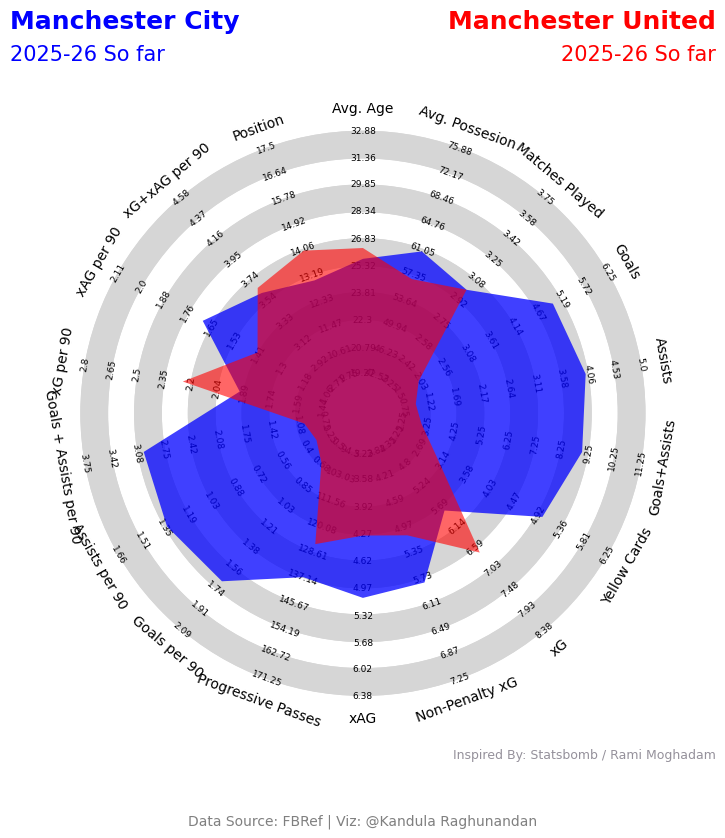

In [151]:
radar=Radar()
fig,ax=radar.plot_radar(ranges=ranges,params=params,values=values,radar_color=["blue","red"],alphas=[.75,.6],title=title,compare=True)
plt.text(
    0.5, -0.05, "Data Source: FBRef | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)
plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Manctiy vs Manutd Radar.png")